<a href="https://practicalai.me"><img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="100" align="left" hspace="20px" vspace="20px"></a>

<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/05_Logistic_Regression/logistic_regression.png" width="170" vspace="10px" align="right">

<div align="left">
<h1>Logistic Regression</h1>

In this lesson, we're going to implement logistic regression for a classification task where we want to probabilistically determine the outcome for a given set of inputs.

<table align="center">
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="25"><a target="_blank" href="https://practicalai.me"> View on practicalAI</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/colab_logo.png" width="25"><a target="_blank" href="https://colab.research.google.com/github/practicalAI/practicalAI/blob/master/notebooks/05_Logistic_Regression.ipynb"> Run in Google Colab</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/github_logo.png" width="22"><a target="_blank" href="https://github.com/practicalAI/practicalAI/blob/master/notebooks/05_Logistic_Regression.ipynb"> View code on GitHub</a>
  </td>
</table>

# Overview

* **Objective:**  Predict the probability of class $y$ given the inputs $X$. The softmax classifier normalizes the linear outputs to determine class probabilities. 
* **Advantages:**
  * Can predict class probabilities given a set on inputs.
* **Disadvantages:**
  * Sensitive to outliers since objective is to minimize cross entropy loss. Support vector machines ([SVMs](https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f)) are a good alternative to counter outliers.
* **Miscellaneous:** Softmax classifier is going to used widely in neural network architectures as the last layer since it produces class probabilities.

Logistic regression is just an extension on linear regression (both are generalized linear methods). We will still learn to model a line (plane) that models $y$ given $X$. Except now we are dealing with classification problems as opposed to regression problems so we want classification probabilities. We'll be using the softmax operation to normalize our logits ($XW$) to derive probabilities.

Our goal is to learn a logistic model $\hat{y}$ that models $y$ given $X$. 

$ \hat{y} = \frac{e^{XW_y}}{\sum_j e^{XW}} $ 
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DXC}$ ($C$ is the number of classes)

This function is known as the multinomial logistic regression or the softmax classifier. The softmax classifier will use the linear equation ($z=XW$) and normalize it (using the softmax function) to produce the probabiltiy for class y given the inputs.

**NOTE**: We'll leave the bias weights out for now to avoid complicating the backpropagation calculation.

### Training

1. Randomly initialize the model's weights $W$ (we'll cover more effective initalization strategies in future lessons).
2. Feed inputs $X$ into the model to receive the logits ($z=XW$). Apply the softmax operation on the logits to get the class probabilies $\hat{y}$ in one-hot encoded form. For example, if there are three classes, the predicted class probabilities could look like [0.3, 0.3, 0.4]. 
  * $ \hat{y} = softmax(z) = softmax(XW) = \frac{e^{XW_y}}{\sum_j e^{XW}} $
3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for logistics regression is cross-entropy loss. 
  * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) $
    * example: $y$ = [0, 0, 1], $\hat{y}$ = [0.3, 0.3, 0.4]
    * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) = - \sum_i [0 * ln(0.3) + 0 * ln(0.3) + 1 * ln(0.4)] = -ln(0.4) $
  * This simplifies our cross entropy objective to the following: $J(\theta) = - ln(\hat{y_i})$ (negative log likelihood). This is only applicable when each input maps to exactly one class.
    * $J(\theta) = - \sum_i ln(\hat{y_i}) = - \sum_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) $
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. Let's assume that our classes are mutually exclusive (a set of inputs could only belong to one class).
 * $\frac{\partial{J}}{\partial{W_j}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_j}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_j}} = - \frac{1}{\frac{e^{XW_y}}{\sum_j e^{XW}}}\frac{\sum_j e^{XW}e^{XW_y}0 - e^{XW_y}e^{XW_j}X}{(\sum_j e^{XW})^2} = \frac{Xe^{XW_j}}{\sum_j e^{XW}} = X\hat{y}$
  * $\frac{\partial{J}}{\partial{W_y}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_y}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_y}} = - \frac{1}{\frac{e^{XW_y}}{\sum_j e^{XW}}}\frac{\sum_j e^{XW}e^{XW_y}X - e^{W_yX}e^{XW_y}X}{(\sum_j e^{XW})^2} = \frac{1}{\hat{y}}(X\hat{y} - X\hat{y}^2) = X(\hat{y}-1)$
5. Update the weights $W$ using a small learning rate $\alpha$. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_j = W_j - \alpha\frac{\partial{J}}{\partial{W_j}}$
6. Repeat steps 2 - 5 to minimize the loss and train the model.

# Set up

In [1]:
# Use TensorFlow 2.x
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import os
import numpy as np
import tensorflow as tf

In [0]:
# Arguments
SEED = 1234
DATA_FILE = 'tumors.csv'
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
NUM_EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 1e-1
INPUT_DIM = 2
HIDDEN_DIM = 1
NUM_CLASSES = 2
SHUFFLE = True

In [0]:
# Set seed for reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Data

We'll used some synthesized data to train our models on. The task is to determine whether a tumor will be benign (harmless) or malignant (harmful) based on leukocyte (white blood cells) count and blood pressure. Note that this is a synethic dataset that has no clinical relevance.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import urllib

### Operations

In [0]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/practicalAI/practicalAI/master/data/tumors.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(DATA_FILE, 'wb') as fp:
    fp.write(html)

In [7]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv(DATA_FILE, header=0)
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [0]:
# Define X and y
X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values

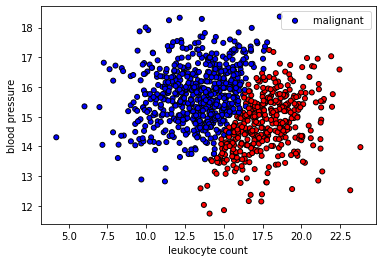

In [9]:
# Plot data
colors = {'benign': 'red', 'malignant': 'blue'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(['malignant ', 'benign'], loc="upper right")
plt.show()

# Split data

In [0]:
import collections
import json
from sklearn.model_selection import train_test_split

### Components

Splitting the dataset for classification tasks requires more than just randomly splitting into train, validation and test sets. We want to ensure that each split has a similar class distribution so that we can learn to predict well across all the classes. We can do this by specifying the `stratify` argument in [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which will be set to the class labels.

In [0]:
def train_val_test_split(X, y, val_size, test_size, shuffle):
    """Split data into train/val/test datasets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

### Operations

In [12]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
class_counts = dict(collections.Counter(y))
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_train[0]: {X_train[0]}")
print (f"y_train[0]: {y_train[0]}")
print (f"Classes: {class_counts}")

X_train: (722, 2), y_train: (722,)
X_val: (128, 2), y_val: (128,)
X_test: (150, 2), y_test: (150,)
X_train[0]: [18.01865938 15.48133647]
y_train[0]: benign
Classes: {'malignant': 611, 'benign': 389}


# Label encoder

You'll notice that our class labels are text. We need to encode them into integers so we can use them in our models. We're going to the scikit-learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) to do this. 

In [0]:
import json
from sklearn.preprocessing import LabelEncoder

In [0]:
# Output vectorizer
y_tokenizer = LabelEncoder()

In [15]:
# Fit on train data
y_tokenizer = y_tokenizer.fit(y_train)
classes = y_tokenizer.classes_
print (f"classes: {classes}")

classes: ['benign' 'malignant']


In [16]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = y_tokenizer.transform(y_train)
y_val = y_tokenizer.transform(y_val)
y_test = y_tokenizer.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: benign
y_train[0]: 0


In [17]:
# Class weights
counts = collections.Counter(y_train)
class_weights = {_class: 1.0/count for _class, count in counts.items()}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: Counter({1: 441, 0: 281}),
class weights: {0: 0.0035587188612099642, 1: 0.0022675736961451248}


<img height="45" src="http://bestanimations.com/HomeOffice/Lights/Bulbs/animated-light-bulb-gif-29.gif" align="left" vspace="5px" hspace="10px">

Class weights are useful for weighting the loss function during training. It tells the model to focus on samples from an under-represented class.

# Standardize data

We need to standardize our data (zero mean and unit variance) in order to optimize quickly. We're only going to standardize the inputs X because out outputs y are class values.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [0]:
# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_val = X_scaler.transform(X_val)
standardized_X_test = X_scaler.transform(X_test)

In [21]:
# Check
print (f"standardized_X_train: mean: {np.mean(standardized_X_train, axis=0)[0]}, std: {np.std(standardized_X_train, axis=0)[0]}")
print (f"standardized_X_val: mean: {np.mean(standardized_X_val, axis=0)[0]}, std: {np.std(standardized_X_val, axis=0)[0]}")
print (f"standardized_X_test: mean: {np.mean(standardized_X_test, axis=0)[0]}, std: {np.std(standardized_X_test, axis=0)[0]}")

standardized_X_train: mean: 3.938600753633857e-15, std: 0.9999999999999998
standardized_X_val: mean: 0.06571155649025341, std: 0.9625041074006321
standardized_X_test: mean: -0.09679265967370689, std: 0.9864056087200104


# From scratch

Before we use TensorFlow 2.0 + Keras we will implent logistic regression from scratch using NumPy so we can:
1. Absorb the fundamental concepts by implementing from scratch
2. Appreciate the level of abstraction TensorFlow provides

<div align="left">
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/lightbulb.gif" width="45px" align="left" hspace="10px">
</div>

It's normal to find the math and code in this section slightly complex. You can still read each of the steps to build intuition for when we implement this using TensorFlow + Keras.

In [22]:
print (f"X: {standardized_X_train.shape}")
print (f"y: {y_train.shape}")

X: (722, 2)
y: (722,)


Our goal is to learn a logistic model $\hat{y}$ that models $y$ given $X$. 

$ \hat{y} = \frac{e^{XW_y}}{\sum e^{XW}} $ 
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DXC}$ ($C$ is the number of classes)

We are going to use multinomial logistic regression even though our task only involves two classes because you can generalize the softmax classifier to any number of classes.

1. Randomly initialize the model's weights $W$.

In [23]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (2, 2)
b: (1, 2)


2. Feed inputs $X$ into the model to receive the logits ($z=XW$). Apply the softmax operation on the logits to get the class probabilies $\hat{y}$ in one-hot encoded form. For example, if there are three classes, the predicted class probabilities could look like [0.3, 0.3, 0.4]. 
  * $ \hat{y} = softmax(z) = softmax(XW) = \frac{e^{XW_y}}{\sum_j e^{XW}} $

In [24]:
# Forward pass [NX2] · [2X2] + [1,2] = [NX2]
logits = np.dot(standardized_X_train, W) + b
print (f"logits: {logits.shape}")
print (f"sample: {logits[0]}")

logits: (722, 2)
sample: [0.01817675 0.00635562]


In [25]:
# Normalization via softmax to obtain class probabilities
exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
print (f"y_hat: {y_hat.shape}")
print (f"sample: {y_hat[0]}")

y_hat: (722, 2)
sample: [0.50295525 0.49704475]


 3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for logistics regression is cross-entropy loss. 

  * $J(\theta) = - \sum_i ln(\hat{y_i}) = - \sum_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) $

In [26]:
# Loss
correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
loss = np.sum(correct_class_logprobs) / len(y_train)
print (f"loss: {loss:.2f}")

loss: 0.69


4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. Let's assume that our classes are mutually exclusive (a set of inputs could only belong to one class).
 * $\frac{\partial{J}}{\partial{W_j}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_j}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_j}} = - \frac{1}{\frac{e^{XW_y}}{\sum_j e^{XW}}}\frac{\sum_j e^{XW}e^{XW_y}0 - e^{XW_y}e^{XW_j}X}{(\sum_j e^{XW})^2} = \frac{Xe^{XW_j}}{\sum_j e^{XW}} = X\hat{y}$
  * $\frac{\partial{J}}{\partial{W_y}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_y}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_y}} = - \frac{1}{\frac{e^{XW_y}}{\sum_j e^{XW}}}\frac{\sum_j e^{XW}e^{XW_y}X - e^{W_yX}e^{XW_y}X}{(\sum_j e^{XW})^2} = \frac{1}{\hat{y}}(X\hat{y} - X\hat{y}^2) = X(\hat{y}-1)$

In [0]:
# Backpropagation
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW = np.dot(standardized_X_train.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)

5. Update the weights  𝑊  using a small learning rate  𝛼. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_j = W_j - \alpha\frac{\partial{J}}{\partial{W_j}}$

In [0]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

6. Repeat steps 2 - 5 to minimize the loss and train the model.

In [29]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX2] · [2X2] = [NX2]
    logits = np.dot(standardized_X_train, W) + b
    
    # Normalization via softmax to obtain class probabilities
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Loss
    correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
    loss = np.sum(correct_class_logprobs) / len(y_train)

    # show progress
    if epoch_num%10 == 0:
        # Accuracy
        y_pred = np.argmax(logits, axis=1)
        accuracy =  np.mean(np.equal(y_train, y_pred))
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

    # Backpropagation
    dscores = y_hat
    dscores[range(len(y_hat)), y_train] -= 1
    dscores /= len(y_train)
    dW = np.dot(standardized_X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.684, accuracy: 0.889
Epoch: 10, loss: 0.447, accuracy: 0.978
Epoch: 20, loss: 0.348, accuracy: 0.978
Epoch: 30, loss: 0.295, accuracy: 0.981
Epoch: 40, loss: 0.260, accuracy: 0.981
Epoch: 50, loss: 0.236, accuracy: 0.981
Epoch: 60, loss: 0.217, accuracy: 0.981
Epoch: 70, loss: 0.203, accuracy: 0.981
Epoch: 80, loss: 0.191, accuracy: 0.981
Epoch: 90, loss: 0.181, accuracy: 0.981


Since we're taking the argmax, we can just calculate logits since normalization won't change which index has the higher value. 

In [0]:
class LogisticRegressionFromScratch():
    def predict(self, x):
        logits = np.dot(x, W) + b
        exp_logits = np.exp(logits)
        y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return y_hat

In [0]:
# Evaluation
model = LogisticRegressionFromScratch()
logits_train = model.predict(standardized_X_train)
pred_train = np.argmax(logits_train, axis=1)
logits_test = model.predict(standardized_X_test)
pred_test = np.argmax(logits_test, axis=1)

In [32]:
# Training and test accuracy
train_acc =  np.mean(np.equal(y_train, pred_train))
test_acc = np.mean(np.equal(y_test, pred_test))
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.98, test acc: 0.95


In [0]:
def plot_multiclass_decision_boundary(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format='png')

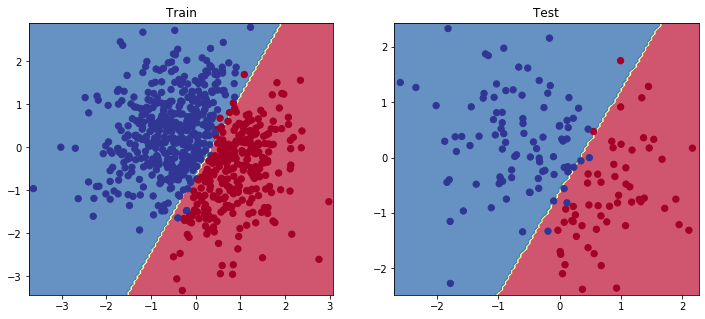

In [34]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

Credit for the plotting functions and the intuition behind all this is due to [CS231n](http://cs231n.github.io/neural-networks-case-study/), one of the best courses for machine learning. Now let's implement logistic regression with TensorFlow + Keras.

# TensorFlow + Keras

We will be using [Dense](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layers to recreate the same model and use [SparseCategoricalCrossentropy](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) as our loss function.

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
# Logistic regression
class LogisticRegression(Model):
    def __init__(self, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = Dense(units=num_classes, activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        y_pred = self.fc1(x_in)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

In [37]:
# Initialize the model
model = LogisticRegression(num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile
model.compile(optimizer=Adam(lr=LEARNING_RATE),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [39]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

Train on 722 samples, validate on 128 samples
Epoch 1/100
722/722 [==============================] - 1s 2ms/sample - loss: 8.3439e-04 - accuracy: 0.8615 - val_loss: 4.1483e-04 - val_accuracy: 0.9688
Epoch 2/100
722/722 [==============================] - 0s 72us/sample - loss: 2.5897e-04 - accuracy: 0.9834 - val_loss: 2.8280e-04 - val_accuracy: 0.9766
Epoch 3/100
722/722 [==============================] - 0s 74us/sample - loss: 1.9570e-04 - accuracy: 0.9861 - val_loss: 2.3468e-04 - val_accuracy: 0.9844
Epoch 4/100
722/722 [==============================] - 0s 94us/sample - loss: 1.7173e-04 - accuracy: 0.9875 - val_loss: 2.1131e-04 - val_accuracy: 0.9844
Epoch 5/100
722/722 [==============================] - 0s 73us/sample - loss: 1.5492e-04 - accuracy: 0.9875 - val_loss: 1.9432e-04 - val_accuracy: 0.9844
Epoch 6/100
722/722 [==============================] - 0s 80us/sample - loss: 1.4234e-04 - accuracy: 0.9889 - val_loss: 1.8063e-04 - val_accuracy: 0.9844
Epoch 7/100
722/722 [==========

# Evaluation

In [0]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Components

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """Plot a confusion matrix using ground truth and predictions."""
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #  Figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Axis
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    ax.xaxis.set_label_position('bottom') 
    ax.xaxis.tick_bottom()

    # Values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:d} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Display
    plt.show()

### Operations

In [42]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [2.5153426e-05 9.9997485e-01]
sample class: 1


In [43]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.99, test acc: 0.97


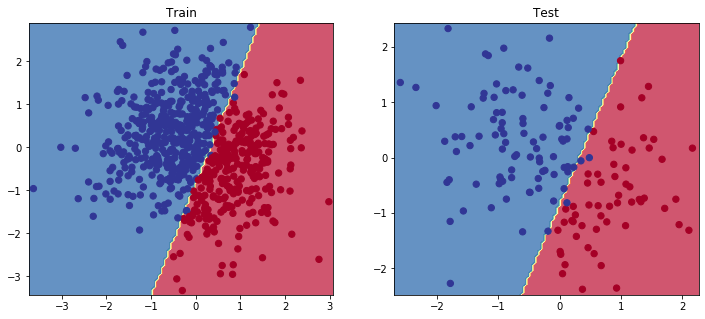

In [44]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

So far we looked at accuracy as the metric that determines our mode's level of performance. But we have several other options when it comes to  evaluation metrics.

<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/05_Logistic_Regression/metrics.png" width="350">

The metric we choose really depends on the situation.
positive - true, 1, tumor, issue, etc., negative - false, 0, not tumor, not issue, etc.

$\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$ 

$\text{recall} = \frac{TP}{TP+FN}$ → (how many of the actual issues did I catch)

$\text{precision} = \frac{TP}{TP+FP}$ → (out of all the things I said were issues, how many were actually issues)

$F_1 = 2 * \frac{\text{precision }  *  \text{ recall}}{\text{precision } + \text{ recall}}$

where: 
* TP: # of samples predicted to be positive and were actually positive
* TN: # of samples predicted to be negative and were actually negative
* FP: # of samples predicted to be positive but were actually negative
* FN: # of samples predicted to be negative but were actually positive

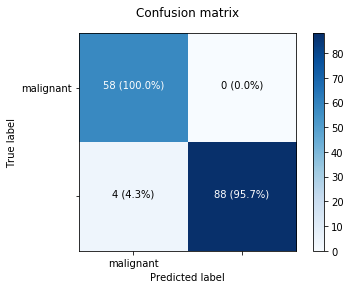

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.96      0.98        92

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150



In [45]:
# Classification report
plot_confusion_matrix(y_true=y_test, y_pred=pred_test, classes=classes)
print (classification_report(y_test, pred_test))

# Inference

In [46]:
# Inputs for inference
X_infer = pd.DataFrame([{'leukocyte_count': 13, 'blood_pressure': 12}])
X_infer.head()

,leukocyte_count,blood_pressure
0,13,12


In [47]:
# Standardize
standardized_X_infer = X_scaler.transform(X_infer)
print (standardized_X_infer)

[[-0.66523095 -3.08638693]]


In [48]:
# Predict
y_infer = model.predict(standardized_X_infer)
_class = np.argmax(y_infer)
print (f"The probability that you have a {classes[_class]} tumor is {y_infer[0][_class]*100.0:.0f}%")

The probability that you have a benign tumor is 99%


# Unscaled weights

Which of the features are most influential?

Note that only X was standardized.

$\hat{y}_{unscaled} = b_{scaled} + \sum_{j=1}^{k}W_{{scaled}_j}x_{{scaled}_j}$
* $x_{scaled} = \frac{x_j - \bar{x}_j}{\sigma_j}$

$\hat{y}_{unscaled} = b_{scaled} + \sum_{j=1}^{k} W_{{scaled}_j} (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = (b_{scaled} - \sum_{j=1}^{k} W_{{scaled}_j}\frac{\bar{x}_j}{\sigma_j}) +  \sum_{j=1}^{k} (\frac{W_{{scaled}_j}}{\sigma_j})x_j$

In the expression above, we can see the expression $\hat{y}_{unscaled} = W_{unscaled}x + b_{unscaled} $

* $W_{unscaled} = \sum_{j=1}^{k} (\frac{W_{{scaled}_j}}{\sigma_j}) $

* $b_{unscaled} = b_{scaled} - \sum_{j=1}^{k} W_{{scaled}_j}\frac{\bar{x}_j}{\sigma_j}$

In [49]:
# Unstandardize weights 
W = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]
W_unscaled = W / X_scaler.scale_
b_unscaled = b - np.sum((W_unscaled * X_scaler.mean_))
print (W_unscaled)
print (b_unscaled)

[[  3.89990762 -10.87473838]
 [ -1.58108892   3.92517096]]
[68.22471 75.63666]


---
<div align="center">

Subscribe to our <a href="https://practicalai.me/#newsletter">newsletter</a> and follow us on social media to get the latest updates!

<a class="ai-header-badge" target="_blank" href="https://github.com/practicalAI/practicalAI">
              <img src="https://img.shields.io/github/stars/practicalAI/practicalAI.svg?style=social&label=Star"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://www.linkedin.com/company/practicalai-me">
              <img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://twitter.com/practicalAIme">
              <img src="https://img.shields.io/twitter/follow/practicalAIme.svg?label=Follow&style=social">
            </a>
              </div>

</div>